# This notebook examines trends in the processed general.txt file (general.pkl)

In [86]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import os
import re
import cpi

processed_path = '/data/ihwang/data_journalism/allfac/processed/'
df_general = pd.read_pickle(processed_path + 'general.pkl')

# Agency prefix dictionary:
with open(processed_path + 'agency_dict.pkl', 'rb') as f_r:
    agency_dict = pickle.load(f_r)
# Entity code dictionary:
with open(processed_path + 'entity_dict.pkl', 'rb') as f_r:
    entity_dict = pickle.load(f_r)

Fields carried over from processing general.txt

In [87]:
for i in df_general.columns:
    print(i)

DBKEY
AUDITYEAR
STATE
CPASTATE
CPAPHONE
TYPEOFENTITY
COGAGENCY
OVERSIGHTAGENCY
TOTFEDEXPEND
LOWRISK
AUDITEENAME
CPAFIRMNAME
CPACONTACT
CPATITLE
ZIPCODE
CPAZIPCODE
TYPEREPORT_FS
TYPEREPORT_MP
REPORTABLECONDITION
MATERIALWEAKNESS
MATERIALNONCOMPLIANCE
REPORTABLECONDITION_MP
MATERIALWEAKNESS_MP
QCOSTS
GOINGCONCERN
CITY
CPACITY
EIN
DOLLARTHRESHOLD


Adjust `DOLLARTHRESHOLD` and `TOTFEDEXPEND_ADJUSTED` for inflation

In [88]:
df_general['DOLLARTHRESHOLD_ADJUSTED'] = df_general.apply(lambda x: cpi.inflate(x.DOLLARTHRESHOLD, x.AUDITYEAR), axis=1)
df_general['TOTFEDEXPEND_ADJUSTED'] = df_general.apply(lambda x: cpi.inflate(x.TOTFEDEXPEND, x.AUDITYEAR), axis=1)

# Basics

Select data to examine

In [114]:
df_analysis = df_general

How has the total number of audits changed over time?

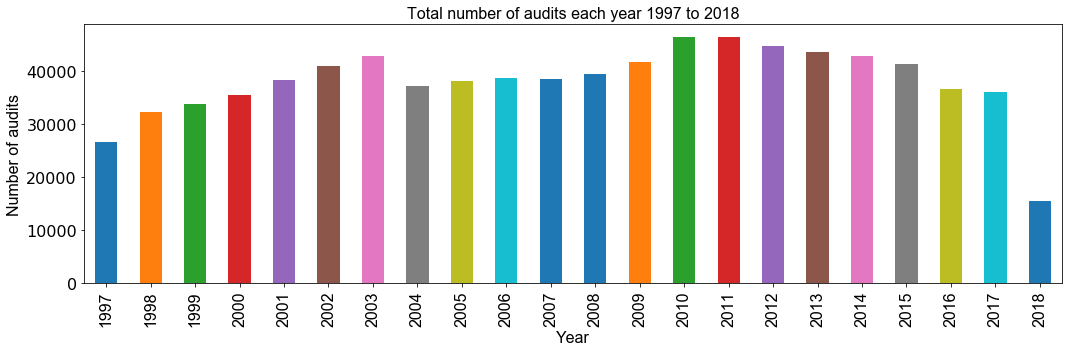

Total number of audits: 838217


In [115]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_num = df_analysis['AUDITYEAR'].value_counts().sort_index()
year_num_plot = series_year_num.plot(kind='bar', fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Number of audits', fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Total number of audits each year %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What is the total amount of federal money subjected to audits over time?

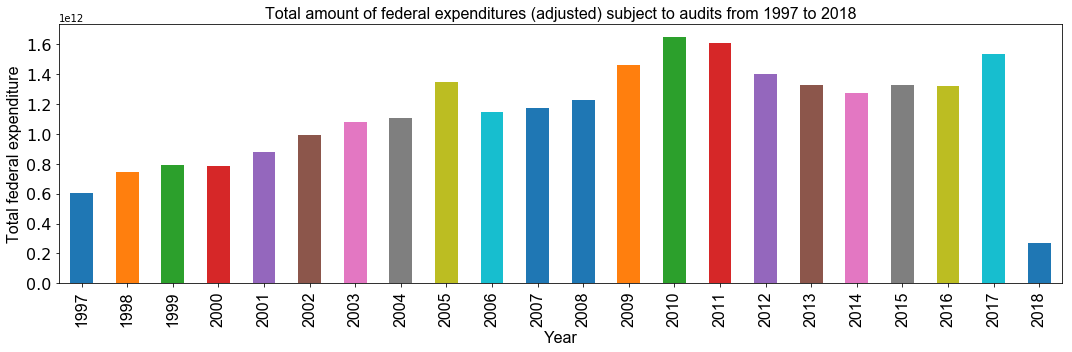

Total number of audits: 838217


In [116]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_totexpend = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].sum().sort_index()
year_totexpend_plot = series_year_totexpend.plot(kind='bar', fontsize=16, ax=axes)
year_totexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_totexpend_plot.set_xticklabels(labels=series_year_totexpend.index, fontsize=16, fontname='Arial')
year_totexpend_plot.set_ylabel('Total federal expenditure', fontsize=16, fontname='Arial')
year_totexpend_plot.set_title(
    'Total amount of federal expenditures (adjusted) subject to audits from %s to %s' 
    %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What has been each year's largest amount of federal money subject to an audit?

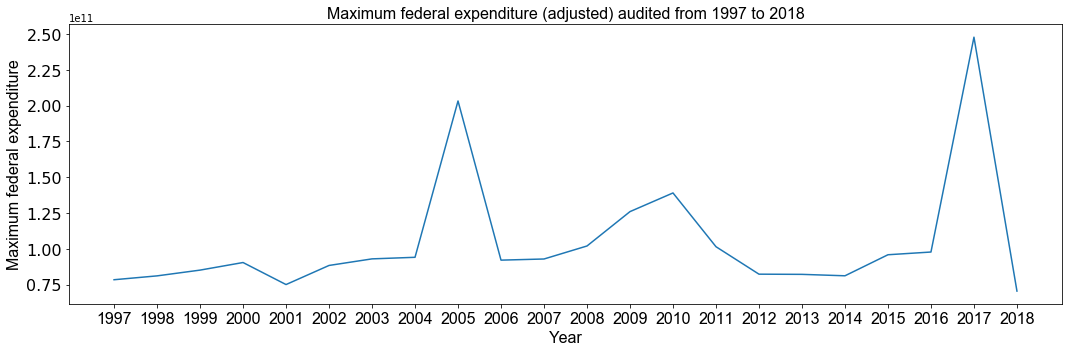

Total number of audits: 838217


In [117]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_maxexpend = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].max()
year_maxexpend_plot = series_year_maxexpend.plot(kind='line', fontsize=16, ax=axes)
year_maxexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_xticks(series_year_num.index)
year_maxexpend_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_maxexpend_plot.set_ylabel('Maximum federal expenditure', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_title(
    'Maximum federal expenditure (adjusted) audited from %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

In [93]:
idx_year_max = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].transform(max) == df_analysis['TOTFEDEXPEND_ADJUSTED']
df_analysis[idx_year_max][['AUDITYEAR', 'AUDITEENAME', 'TOTFEDEXPEND_ADJUSTED']].sort_values('AUDITYEAR')

,AUDITYEAR,AUDITEENAME,TOTFEDEXPEND_ADJUSTED
70174,1997,CALIFORNIA STATE REPORT,7.834921e+10
70175,1998,CALIFORNIA STATE REPORT,8.104556e+10
70176,1999,STATE OF CALIFORNIA,8.506873e+10
70177,2000,STATE OF CALIFORNIA,9.036922e+10
70178,2001,STATE OF CALIFORNIA,7.498343e+10
70179,2002,STATE OF CALIFORNIA,8.832401e+10
70180,2003,STATE OF CALIFORNIA,9.291915e+10
70181,2004,STATE OF CALIFORNIA,9.402078e+10
785408,2005,JOHNS HOPKINS UNIVERSITY,2.032065e+11
70183,2006,STATE OF CALIFORNIA,9.203489e+10


What is the median `DOLLARTHRESHOLD_ADJUSTED` per year?

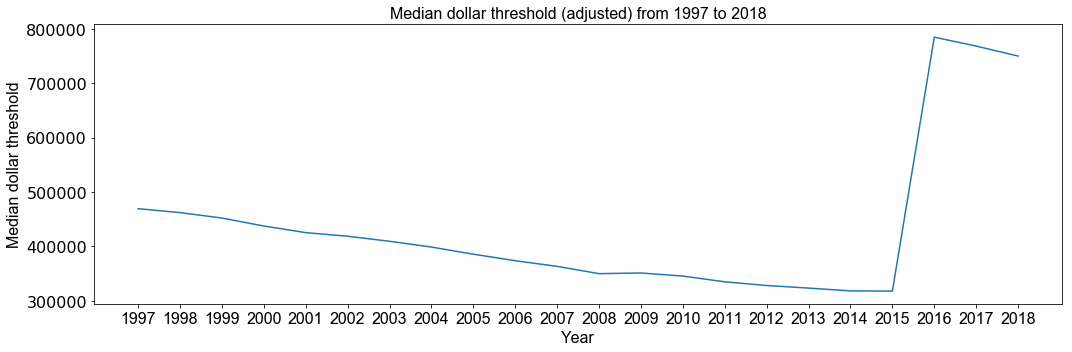

Total number of audits: 838217


In [118]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_maxexpend = df_analysis.groupby('AUDITYEAR')['DOLLARTHRESHOLD_ADJUSTED'].median()
year_maxexpend_plot = series_year_maxexpend.plot(kind='line', fontsize=16, ax=axes)
year_maxexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_xticks(series_year_num.index)
year_maxexpend_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_maxexpend_plot.set_ylabel('Median dollar threshold', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_title(
    'Median dollar threshold (adjusted) from %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What percent of auditees are low risk?

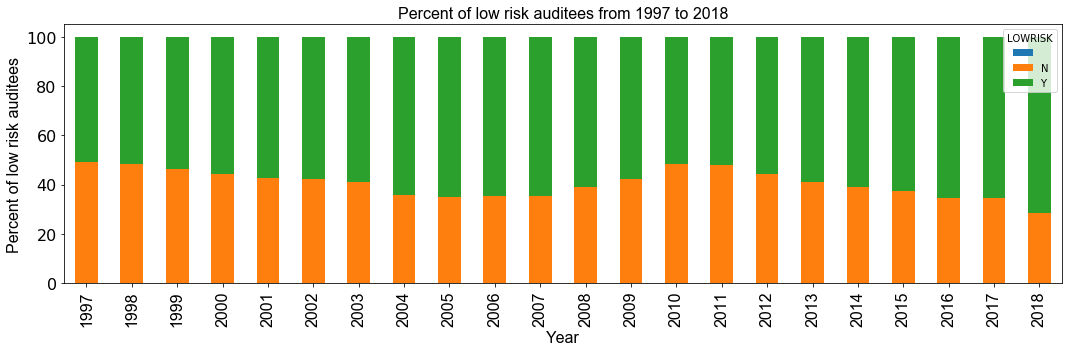

Total number of audits: 838217


In [120]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_num = df_analysis.groupby('AUDITYEAR')['LOWRISK'].value_counts().sort_index().unstack()
df_year_pct = df_year_num.div(df_year_num.sum(axis=1), axis=0) * 100
year_num_plot = df_year_pct.plot(kind='bar', stacked=True, fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Percent of low risk auditees', fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Percent of low risk auditees from %s to %s' 
    %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What percent of auditees have a financial issue? Choose between `QCOSTS`, `GOINGCONCERN`, `MATERIALWEAKNESS`, `MATERIALNONCOMPLIANCE`

In [108]:
# sortby = 'QCOSTS'
# sortby = 'GOINGCONCERN'
sortby = 'MATERIALWEAKNESS'
# sortby = 'MATERIALNONCOMPLIANCE'

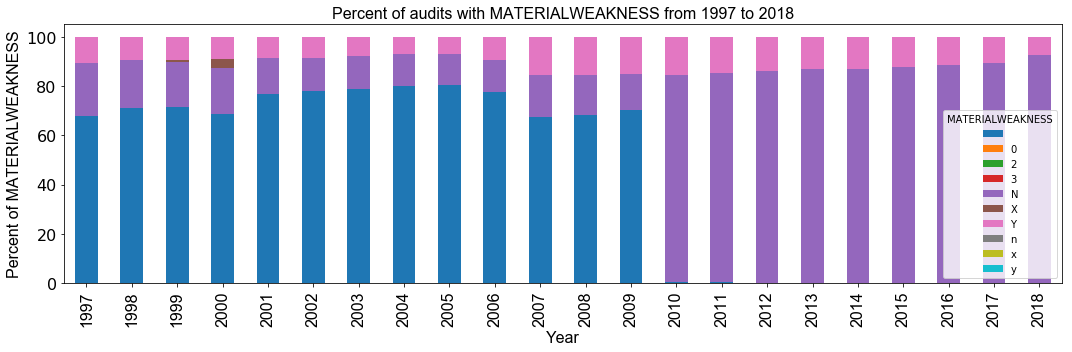

Total number of audits: 838217


In [121]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_num = df_analysis.groupby('AUDITYEAR')[sortby].value_counts().sort_index().unstack()
df_year_pct = df_year_num.div(df_year_num.sum(axis=1), axis=0) * 100
year_num_plot = df_year_pct.plot(kind='bar', stacked=True, fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Percent of %s' %sortby, fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Percent of audits with %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

# Basic sorts

Select data

In [187]:
df_analysis = df_general
# df_analysis = df_general[df_general['LOWRISK']=='N']
# df_analysis = df_general[df_general['TOTFEDEXPEND'] <= 1e6]
# df_analysis = df_general[df_general['TOTFEDEXPEND'] >= 3e6]
# df_analysis = df_general[(df_general['TOTFEDEXPEND'] >= 1e6) & (df_general['TOTFEDEXPEND'] <= 5e6)]


df_analysis = df_analysis[~df_analysis['STATE'].isin(['AS','MP','FM','PR','GU','PW','MH','VI'])]

Select sortby

In [188]:
# sortby = 'TYPEOFENTITY'
sortby = 'STATE'
# sortby = 'COGAGENCY'
# sotrby = 'OVERSIGHTAGENCY'

Now plot percent of audits by entity type

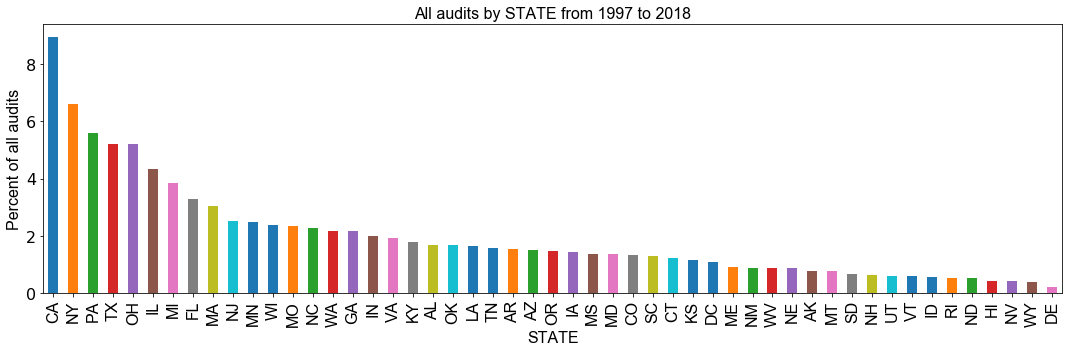

Total number of audits: 831431


In [189]:
fig, axes = plt.subplots(figsize=(15, 5))
series_sortby = df_analysis.groupby(sortby).size().sort_values(ascending=False) / len(df_analysis) * 100
percent_audits_plot = series_sortby.plot(kind='bar', fontsize=16, ax=axes)
percent_audits_plot.set_xlabel(sortby, fontsize=16, fontname='Arial')
percent_audits_plot.set_xticklabels(labels=series_sortby.index, fontsize=16, fontname='Arial')
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16, fontname='Arial')
percent_audits_plot.set_title(
    'All audits by %s from %s to %s' %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

In [190]:
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.head(10).index:
        if entity in entity_dict.keys():
            print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.head(10).index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERISGHTAGENCY'):
    for agency in series_sortby.head(10).index:
        if agency in agency_dict.keys():
            print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

8.93543781745 	 CA
6.58960274515 	 NY
5.58771563726 	 PA
5.21498476723 	 TX
5.20921158821 	 OH
4.32158531496 	 IL
3.82918125497 	 MI
3.30225839547 	 FL
3.02694992128 	 MA
2.51626412775 	 NJ


In [191]:
# df_sortby_expenditures.sort_values('PCT_TOTFEDEXPEND_ADJUSTED', ascending=False)
df_sortby_expenditures.sort_values('PCT_sortby', ascending=False)

,PCT_sortby,PCT_TOTFEDEXPEND_ADJUSTED
CA,11.204002,0.130909
NY,6.910040,0.105718
TX,5.417596,0.076276
PA,5.213924,0.072672
OH,4.265062,0.030779
FL,4.225497,0.037861
IL,3.999119,0.034266
MI,3.527785,0.027105
MA,3.170671,0.026642
NC,2.899224,0.031120


What are trends over time?

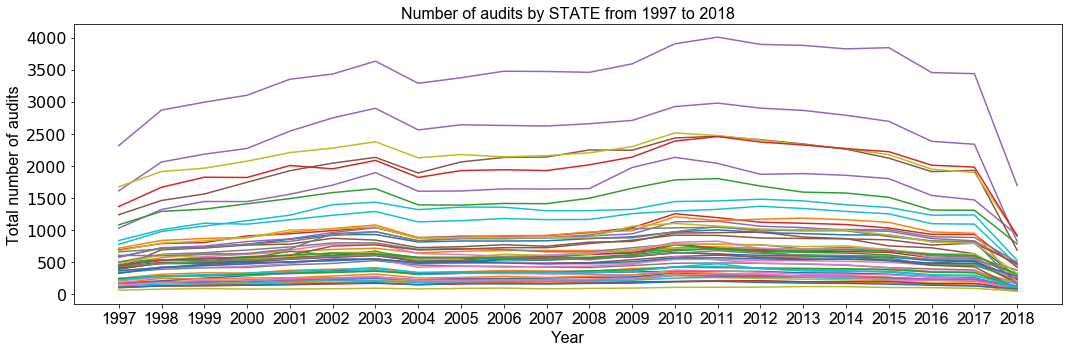

In [192]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_sortby = df_analysis.groupby('AUDITYEAR')[sortby].value_counts().unstack()
year_sortby_plot = df_year_sortby.plot(kind='line', fontsize=16, ax=axes, legend=False)
year_sortby_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_sortby_plot.set_xticks(df_year_sortby.index)
year_sortby_plot.set_xticklabels(labels=df_year_sortby.index, fontsize=16, fontname='Arial')
year_sortby_plot.set_ylabel('Total number of audits', fontsize=16, fontname='Arial')
year_sortby_plot.set_title(
    'Number of audits by %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()

In [193]:
year = 2017
series_sortby = df_year_sortby.loc[year].sort_values(ascending=False).head(10)
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.index:
        if entity in entity_dict.keys():
                print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERSIGHTAGENCY'):
    for agency in series_sortby.index:
        if agency in agency_dict.keys():
                print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

3438 	 CA
2335 	 NY
1978 	 TX
1927 	 OH
1894 	 PA
1465 	 IL
1304 	 MI
1231 	 FL
1087 	 MA
945 	 NJ


What are the total federal expenditures over time?

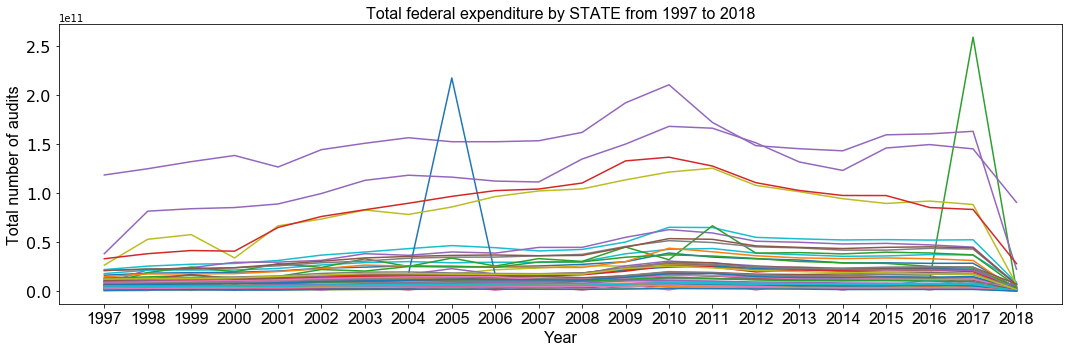

In [194]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_sortby_expend = df_analysis.groupby(['AUDITYEAR', sortby])['TOTFEDEXPEND_ADJUSTED'].sum().unstack()
year_sortby_expend_plot = df_year_sortby_expend.plot(kind='line', fontsize=16, ax=axes, legend=False)
year_sortby_expend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_xticks(df_year_sortby.index)
year_sortby_expend_plot.set_xticklabels(labels=df_year_sortby.index, fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_ylabel('Total number of audits', fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_title(
    'Total federal expenditure by %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.tight_layout()
plt.show()

In [195]:
year = 2005
series_sortby = df_year_sortby_expend.loc[year].sort_values(ascending=False).head(10)
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.index:
        if entity in entity_dict.keys():
                print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERSIGHTAGENCY'):
    for agency in series_sortby.index:
        if agency in agency_dict.keys():
                print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

217848525112.0 	 MD
152767562219.0 	 CA
116596030228.0 	 NY
96962121988.1 	 TX
86137910371.8 	 PA
46703259757.8 	 FL
40196199264.1 	 IL
36711989087.1 	 OH
34876260583.8 	 NC
33954166547.3 	 MI


Select two axes to compare

In [196]:
series_dict = {}
series_sortby = df_analysis.groupby(sortby).size().sort_values(ascending=False) / len(df_analysis) * 100
series_dict['Percent of all audits'] = series_sortby
for fs_sortby in ['QCOSTS', 'GOINGCONCERN','MATERIALWEAKNESS','MATERIALNONCOMPLIANCE']:
    df_fs_sortby = df_analysis.groupby(sortby)[fs_sortby].value_counts().sort_index().unstack()
    df_fs_sortby_norm = df_fs_sortby.div(df_fs_sortby.sum(axis=1), axis=0) * 100
    series_fs_sortby = df_fs_sortby_norm['Y']
    series_dict[fs_sortby] = series_fs_sortby
series_sortby_expenditures = df_analysis.groupby(sortby)['TOTFEDEXPEND_ADJUSTED'].sum().sort_values(ascending=False) / df_analysis['TOTFEDEXPEND_ADJUSTED'].sum()
series_dict['Percent of total expenditure'] = series_sortby_expenditures
print(series_dict.keys())

dict_keys(['Percent of all audits', 'QCOSTS', 'GOINGCONCERN', 'MATERIALWEAKNESS', 'MATERIALNONCOMPLIANCE', 'Percent of total expenditure'])


In [202]:
series_1 = 'Percent of all audits'
series_2 = 'MATERIALWEAKNESS'

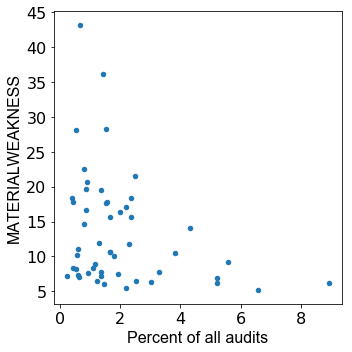

In [203]:
fig, axes = plt.subplots(figsize=(5, 5))
df_plot = pd.concat(
    [series_dict[series_1].rename('series1'), series_dict[series_2].rename('series2')], 
    axis=1, sort=True
)
plot = df_plot.plot(
    x='series1', y='series2', kind='scatter', fontsize=16, ax=axes
)
plot.set_xlabel(series_1, fontsize=16, fontname='Arial')
plot.set_ylabel(series_2, fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()

In [204]:
df_plot.sort_values('series2', ascending=False)

,series1,series2
SD,0.671012,43.233554
IA,1.431628,36.142149
AR,1.523157,28.229627
ND,0.520308,28.178456
MT,0.774809,22.570630
MN,2.492329,21.556800
NM,0.880049,20.664207
WV,0.869104,19.651259
MS,1.357419,19.457735
WI,2.361591,18.451744
